In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [39]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [41]:
from PIL import Image

In [83]:
import random

In [75]:
from matplotlib.patches import Rectangle,Circle,Polygon

In [71]:
import matplotlib

In [73]:
help(matplotlib.patches)

Help on module matplotlib.patches in matplotlib:

NAME
    matplotlib.patches - Patches are `.Artist`\s with a face color and an edge color.

CLASSES
    matplotlib.artist.Artist(builtins.object)
        Patch
            Annulus
            Arrow
            Ellipse
                Arc
                Circle
            FancyArrowPatch
                ConnectionPatch
            FancyBboxPatch
            PathPatch
                StepPatch
            Polygon
                FancyArrow
            Rectangle
            RegularPolygon
                CirclePolygon
            Shadow
            Wedge
    _Style(builtins.object)
        ArrowStyle
        BoxStyle
        ConnectionStyle

    class Annulus(Patch)
     |  Annulus(xy, r, width, angle=0.0, **kwargs)
     |
     |  An elliptical annulus.
     |
     |  Method resolution order:
     |      Annulus
     |      Patch
     |      matplotlib.artist.Artist
     |      builtins.object
     |
     |  Methods defined here:
     |
 

    Intention: be able to randomly generate images to feed to LLM to test its ability to "count"

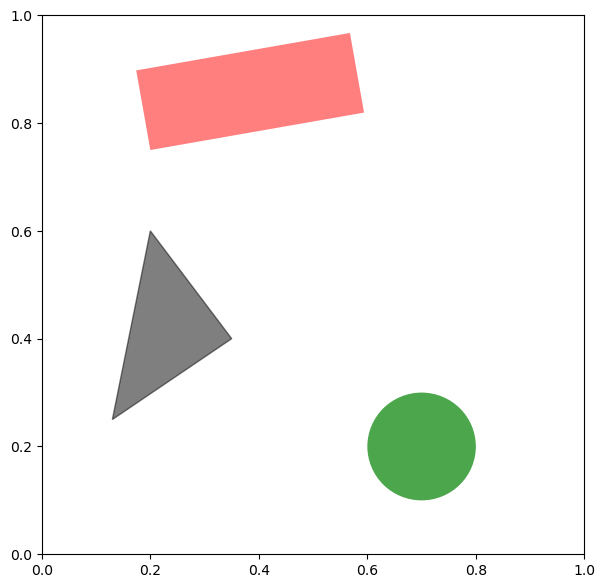

In [188]:
fig = plt.figure(figsize=(7,7),frameon=False)

ax = fig.add_subplot(1, 1, 1)

plt.xlim(0,1)
plt.ylim(0,1)

pp1 = Rectangle((0.2, 0.75), #coords of bottom left corner
                width=0.4, 
                height=0.15,
                angle=10,
                facecolor="red",
                alpha=0.5,)

pp2 = Circle((0.7, 0.2),
             radius=0.1,
             facecolor="green",
             alpha=0.7)

pp3 = Polygon([[0.13, 0.25],
              [0.35, 0.4],
              [0.2, 0.6]],
              color="k",
              alpha=0.5,
              )

#depict illustrations
ax.add_patch(pp1)
ax.add_patch(pp2)
ax.add_patch(pp3)

plt.show()

In [149]:
import matplotlib.colors as mcolors

In [151]:
colors = list(mcolors.BASE_COLORS)
colors

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [284]:
colors.remove("w")
colors

['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [169]:
round(random.random(),2) #generates number between 0 and 1

0.82

In [226]:
random.choice(colors)

'g'

In [230]:
def rand_num():
    """Outputs random number between 0 & 1 with 2 decimal places"""
    return round(random.random(),2)

def rand_color():
    """Outputs random base color"""
    return random.choice(colors)

In [286]:
def generate_coord():
    """Outputs a tuple/coordinate point"""
    return (rand_num(),rand_num()) #tuple

def distance_formula(coord1,coord2):
    """Calculate distance given two tuples/coordinate points"""
    x1,y1 = coord1
    x2,y2 = coord2
    dist = ( (x1-x2)**2 + (y1-y2)**2 )**0.5
    return dist

def is_triangle(coord1,coord2,coord3):
    """Test if real triangle based on 3 points
    Boolean output"""
    side1 = distance_formula(coord1,coord2)
    side2 = distance_formula(coord3,coord2)
    side3 = distance_formula(coord1,coord3)
    if not (side1+side2>side3 and side1+side3>side1 and side2+side3>side1):
        return False
    if side1 == 0 or side2 == 0 or side3 == 0:
        return False
    else:
        return True

In [198]:
rand_num()

0.31

In [625]:
def rand_small_num(limit=0.5):
    """Keeps random number under certain decimal value; automatically set to 0.5"""
    h = rand_num()
    while h > limit:
        h /= 2
    return h

In [627]:
def generate_rectangle(w=0.5,h=0.35):
    """Generates rectangle; width/height can be varied"""
    return Rectangle(generate_coord(), 
                width=rand_small_num(w), 
                height=rand_small_num(h),
                angle=rand_num()*10,
                facecolor=rand_color(),
                alpha=0.6
                )

In [629]:
def generate_circle(r=0.3):
    """Generates circle; radius can be varied"""
    return Circle(generate_coord(),
           radius=rand_small_num(r),
           facecolor=rand_color(),
           alpha=0.6
           )

In [631]:
def generate_triangle():
    "Generates triangle"
    valid_triangle = False
    while not valid_triangle:
        coord1,coord2,coord3 = generate_coord(),generate_coord(),generate_coord()
        valid_triangle = is_triangle(coord1,coord2,coord3)
    
    return Polygon([coord1,
           coord2,
           coord3],
           color=random.choice(colors),
           alpha=0.6
           )

    Modularize later?

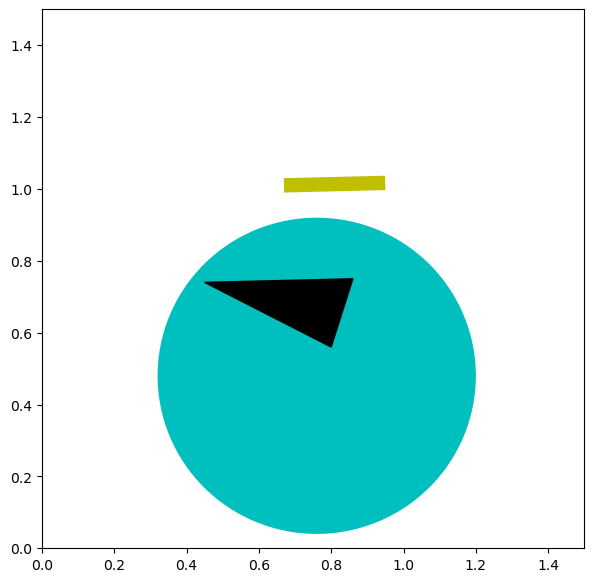

In [500]:
#Make image
fig = plt.figure(figsize=(7,7),frameon=False)
ax = fig.add_subplot(1, 1, 1)
plt.xlim(0,1.5)
plt.ylim(0,1.5)

#randomly generate shapes
rectangle = generate_rectangle()

circle = generate_circle()

triangle = generate_triangle()


#depict illustrations
ax.add_patch(rectangle)
ax.add_patch(circle)
ax.add_patch(triangle)

plt.show()

In [184]:
random.randint(0,5)

0

In [663]:
def rand_count(max=5):
    """Returns random whole number; max can be varied"""
    return random.randint(0,max)

In [633]:
def multiple_shapes(ax,max=5,limit1=0.5,limit2=0.35,verbose=False):
    """Automatically generates multiple shapes and adds to given figure; can generate string counting each shape type (automatically set to False)"""
    #rectangles
    counter = rand_count(max)
    rect=counter
    while counter > 0:
        rectangle = generate_rectangle(limit1,limit2)
        ax.add_patch(rectangle)
        counter -= 1
    
    #circles
    counter = rand_count(max)
    circ=counter
    while counter > 0:
        circle = generate_circle(limit2)
        ax.add_patch(circle)
        counter -= 1
    
    #triangles
    counter = rand_count(max)
    tri=counter
    while counter > 0:
        triangle = generate_triangle()
        ax.add_patch(triangle)
        counter -= 1

    if verbose:
        return f"There are {rect} rectangles, {circ} circles, and {tri} triangles in this image."

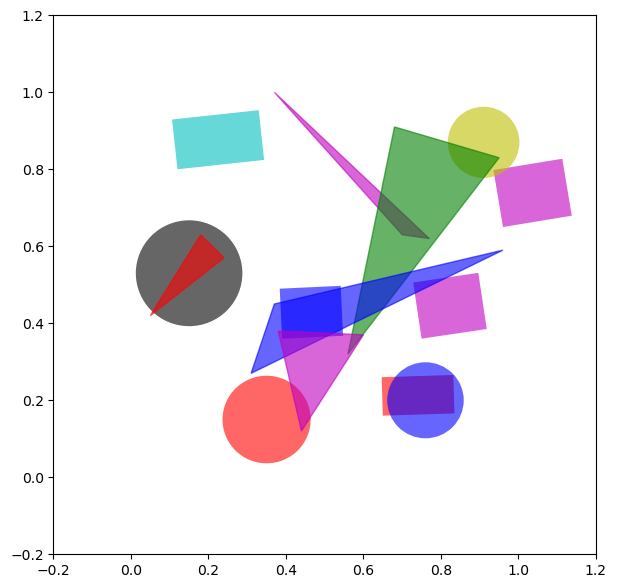

In [619]:
fig = plt.figure(figsize=(7,7),frameon=False)
ax = fig.add_subplot(1, 1, 1,
                     xlim=(-0.2,1.2),
                     ylim=(-0.2,1.2))

multiple_shapes(ax,limit1=0.3,limit2=0.18)
plt.show()

In [665]:
def generate_image(verb=False,max=5,l1=0.3,l2=0.18,):
    """Fully generates image with random assortment of shapes; descriptive statement can be generated; shape sizes can be adjusted"""
    fig = plt.figure(figsize=(6,6),frameon=False)
    ax = fig.add_subplot(1, 1, 1,
                         xlim=(-0.2,1.2),
                         ylim=(-0.2,1.2))
    description = multiple_shapes(ax,max,limit1=l1,limit2=l2,verbose=verb)
    
    if verb:
        print(description)
    
    plt.show()
    
    return description

There are 1 rectangles, 3 circles, and 0 triangles in this image.


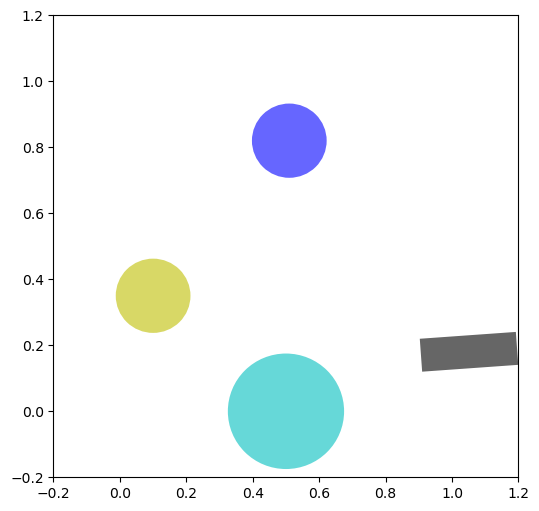

In [623]:
generate_image(True)